/kaggle/input/breast-cancer-wisconsin-data/data.csv

 
 Shape of dataframe: (569, 33)
 

Columns present in the data: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
 



0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2  

<AxesSubplot:xlabel='radius_mean', ylabel='concave points_mean'>

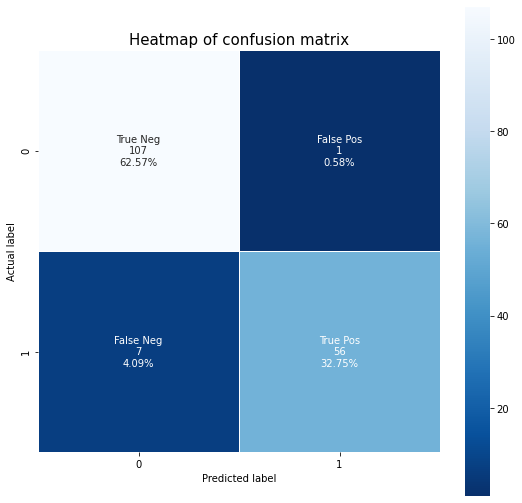

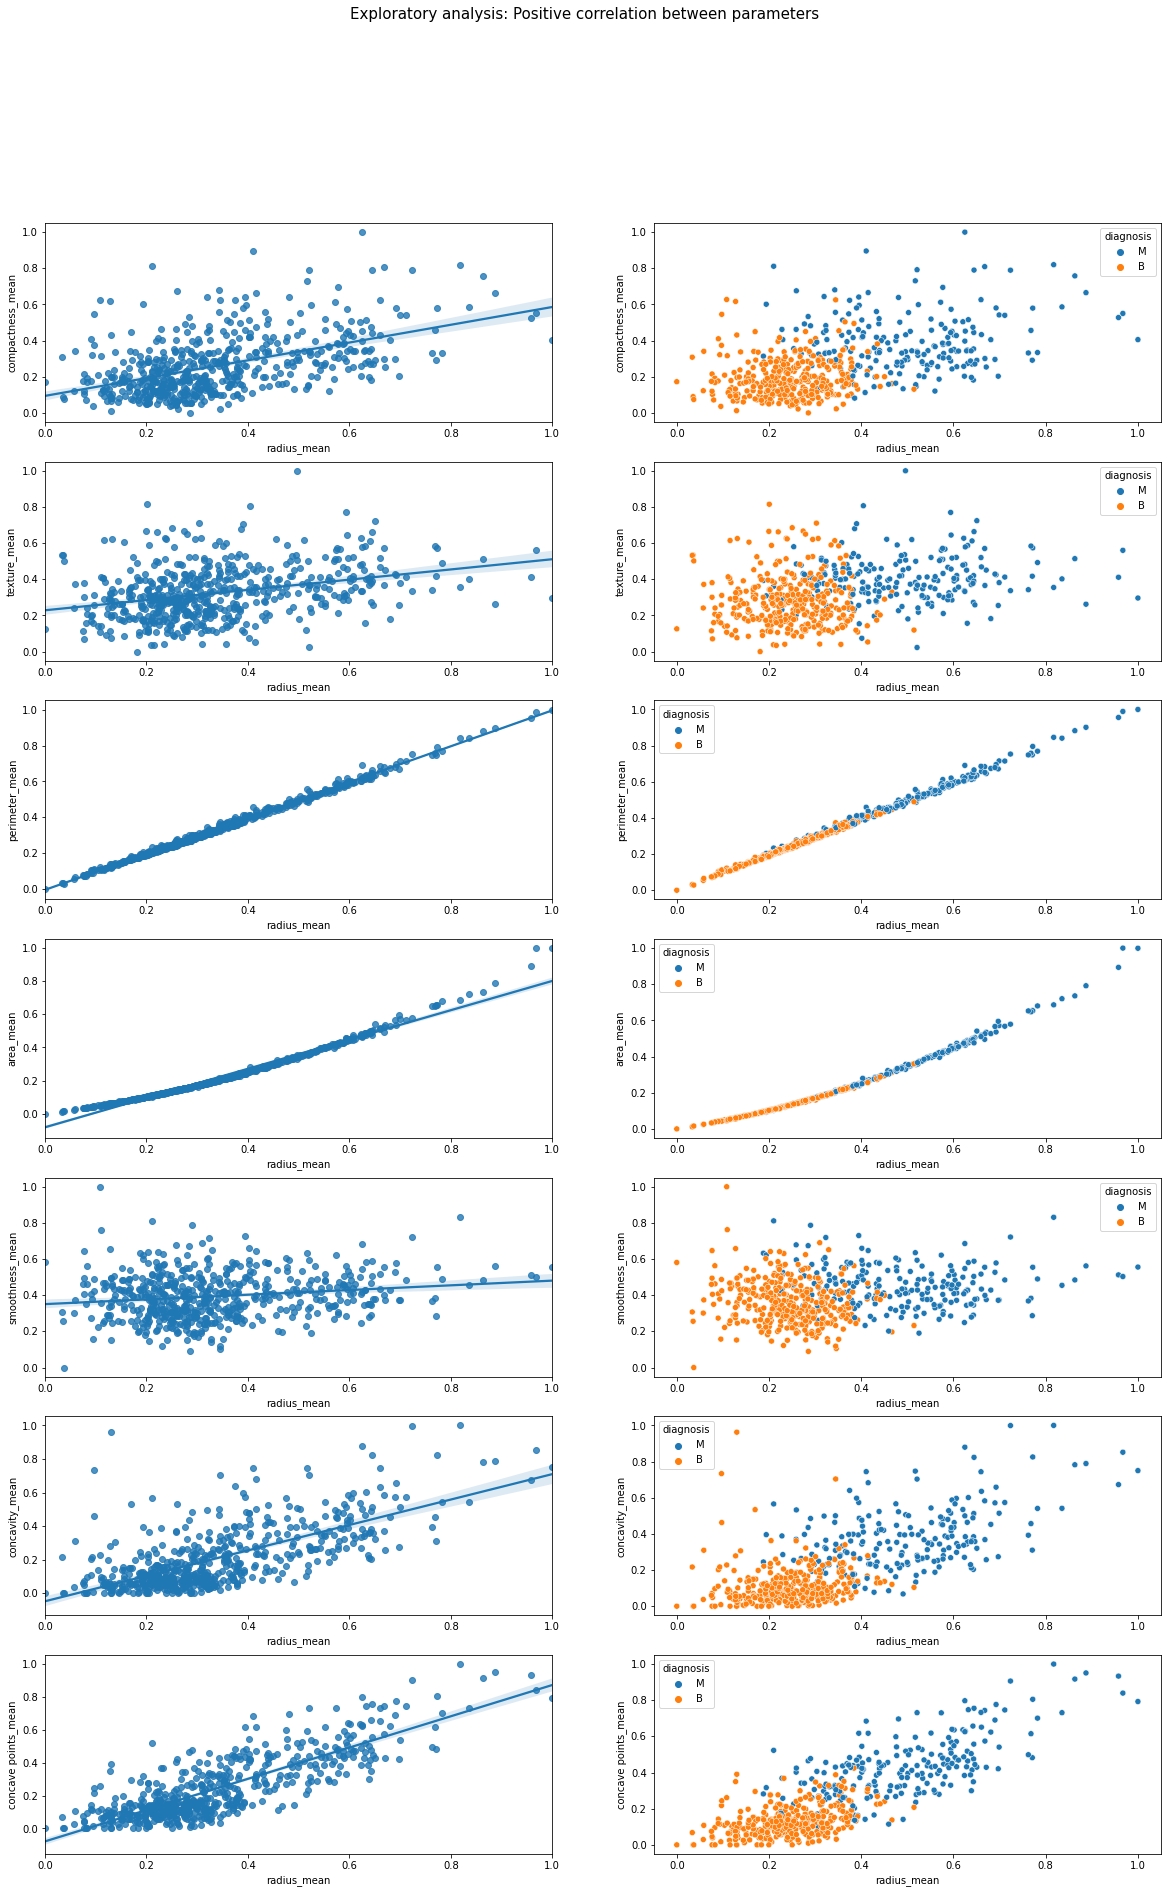

In [16]:
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

input_path = ""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        input_path = os.path.join(dirname, filename)


df = pd.read_csv(input_path)

print("\n \n Shape of dataframe: "+ str(df.shape) + "\n \n")
print("Columns present in the data: "+ str(list(df.columns)) + "\n \n")
df = df.dropna(axis = 1) #drops Unnamed:32 column. Alternative -> df = df.drop(['Unnamed: 32'], axis = 1)
diagnosis = df['diagnosis']
df = df.drop(['diagnosis'], axis = 1) #dropping diagnosis to be able to normalize the df since diagnosis has string values

#normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(x_scaled, columns = df.columns)

#adding diagnosis back in the df
df.insert(1, "diagnosis", diagnosis, True)



print("====================\n\n")

print(df.iloc[:, 1].head())
print(df.iloc[:, 2:].head())

y = df.iloc[:, 1] #output = diagnosis
X = df.iloc[:, 2:] #input = all parameters

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('\n\nAccuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test, y_test))+"\n\n")


#confusion matrix - gives us the number of correct and incorrect predictions
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix for the test data: \n")
print(confusion_matrix)

plt.figure(figsize=(9,9))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Heatmap of confusion matrix', size = 15);

#classification gives us the f1 score for each class (B or M)
print("\n Classification report:\n\n"+classification_report(y_test, y_pred))

fig, axes = plt.subplots(7, 2, figsize=(20, 30))
fig.suptitle('Exploratory analysis: Positive correlation between parameters', size=15)


sns.regplot(ax = axes[0, 0], data = df, x = 'radius_mean', y='compactness_mean')
sns.scatterplot(ax = axes[0, 1], data = df, x = 'radius_mean', y='compactness_mean', hue = 'diagnosis')

sns.regplot(ax = axes[1, 0], data = df, x = 'radius_mean', y='texture_mean')
sns.scatterplot(ax = axes[1, 1], data = df, x = 'radius_mean', y='texture_mean', hue = 'diagnosis')

sns.regplot(ax = axes[2, 0], data = df, x = 'radius_mean', y='perimeter_mean')
sns.scatterplot(ax = axes[2, 1], data = df, x = 'radius_mean', y='perimeter_mean', hue = 'diagnosis')

sns.regplot(ax = axes[3, 0], data = df, x = 'radius_mean', y='area_mean')
sns.scatterplot(ax = axes[3, 1], data = df, x = 'radius_mean', y='area_mean', hue = 'diagnosis')

sns.regplot(ax = axes[4, 0], data = df, x = 'radius_mean', y='smoothness_mean')
sns.scatterplot(ax = axes[4, 1], data = df, x = 'radius_mean', y='smoothness_mean', hue = 'diagnosis')

sns.regplot(ax = axes[5, 0], data = df, x = 'radius_mean', y='concavity_mean')
sns.scatterplot(ax = axes[5, 1], data = df, x = 'radius_mean', y='concavity_mean', hue = 'diagnosis')

sns.regplot(ax = axes[6, 0], data = df, x = 'radius_mean', y='concave points_mean')
sns.scatterplot(ax = axes[6, 1], data = df, x = 'radius_mean', y='concave points_mean', hue = 'diagnosis')




        